# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`

> "Hi Team! 👋

> As discussed during the lesson and weekly class email, the current notebook contains 10 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. This is why a two-week time window for submission is given. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between October 2014 through September 2021 (eight years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM
- `GE` Stock of General Electric

In [3]:
def obtain(S, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,
                                  start = start,
                                  end = end)
              )
    OUR_DATA = map(data, S)
    return (pd.concat(OUR_DATA,
                      keys = S,
                      names = ["Ticker", "Date"])
           )

In [4]:
S = ["GE", "IBM", "WMT"]
start = dt.datetime(2014, 9, 30)
end = dt.datetime(2021, 9, 30)
D = obtain(S, start, end)
D_ADJ = D["Adj Close"].reset_index().pivot("Date",
                                           "Ticker",
                                           "Adj Close")
D_ADJ

Ticker,GE,IBM,WMT
Date,,,
2014-09-29,168.875,135.330,64.898
2014-09-30,170.204,135.465,65.231
2014-10-01,167.148,133.567,64.932
2014-10-02,166.882,133.382,65.026
2014-10-03,168.742,134.638,65.956
...,...,...,...
2021-09-24,103.800,131.444,143.170
2021-09-27,105.350,132.467,142.250
2021-09-28,105.730,131.424,140.500


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

In [5]:
IBM = pd.DataFrame(D_ADJ["IBM"])
IBM.rename(columns = {"IBM": "PRICE"},
           inplace = True)
IBM["SMA_20"] = IBM["PRICE"].rolling(20).mean()
IBM["SMA_60"] = IBM["PRICE"].rolling(60).mean()
IBM.dropna(inplace = True)
IBM["POSITION"] = np.where(IBM["SMA_20"] > IBM["SMA_60"],
                           1, -1)
IBM

,PRICE,SMA_20,SMA_60,POSITION
Date,,,,
2014-12-22,115.994,114.957,120.100,-1
2014-12-23,116.569,114.960,119.788,-1
2014-12-24,116.267,114.962,119.468,-1
2014-12-26,116.641,114.976,119.186,-1
2014-12-29,115.326,114.917,118.885,-1
...,...,...,...,...
2021-09-24,131.444,131.380,133.094,-1
2021-09-27,132.467,131.339,132.989,-1
2021-09-28,131.424,131.267,132.973,-1


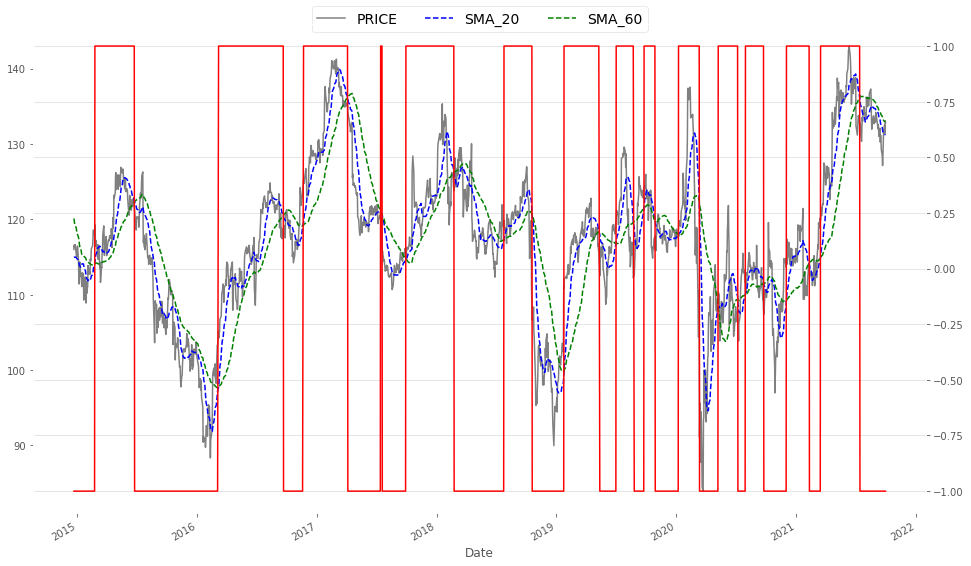

In [8]:
ax = IBM[["PRICE",
          "SMA_20",
          "SMA_60",
          "POSITION"]].plot(secondary_y = "POSITION",
                            figsize = (16, 10),
                            style = ["grey",
                                     "b--",
                                     "g--",
                                     "red"])

ax.legend(loc = "upper center",
          bbox_to_anchor = (0.5, 1.05),
          ncol = 3)

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

<AxesSubplot:xlabel='Date'>

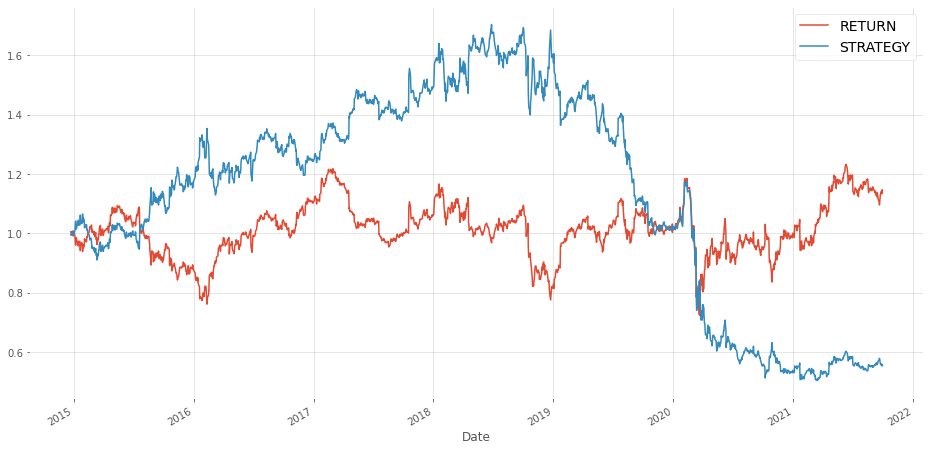

In [9]:
IBM["RETURN"] = np.log(IBM["PRICE"] / IBM["PRICE"].shift(1))
IBM["STRATEGY"] = IBM["POSITION"].shift(1) * IBM["RETURN"]
IBM[["RETURN", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = (16, 8))

### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

In [10]:
IBM["CUMULATIVE_RETURNS"] = IBM["STRATEGY"].cumsum().apply(np.exp)
IBM["MAX_GROSS_PERFORMANCE"] = IBM["CUMULATIVE_RETURNS"].cummax()
DRAWDOWN = IBM["MAX_GROSS_PERFORMANCE"] - IBM["CUMULATIVE_RETURNS"]
PERIOD = DRAWDOWN[DRAWDOWN == 0].index[1:].to_pydatetime() - DRAWDOWN[DRAWDOWN == 0].index[:-1].to_pydatetime()
# PERIOD = np.append(PERIOD,[dt.datetime.now() - DRAWDOWN[DRAWDOWN == 0].index[-1].to_pydatetime()])

<AxesSubplot:xlabel='Date'>

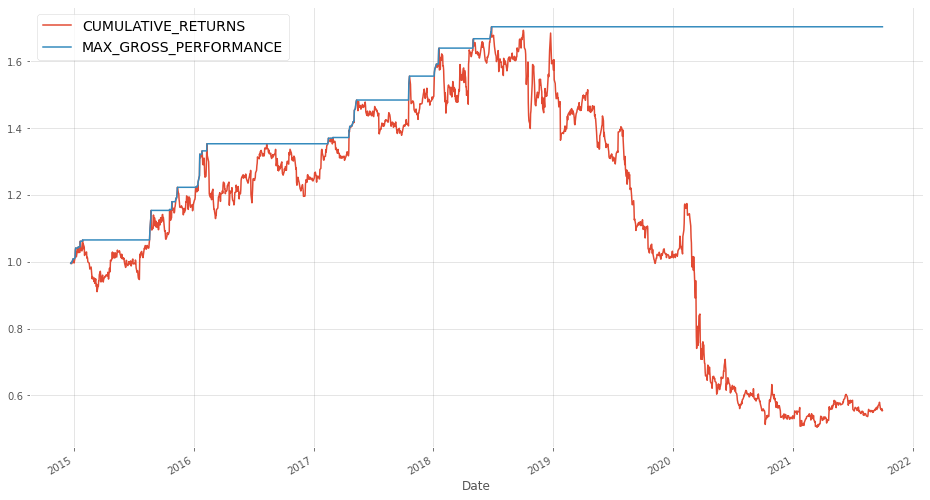

In [11]:
IBM[["CUMULATIVE_RETURNS", "MAX_GROSS_PERFORMANCE"]].dropna().plot(figsize = (16, 9))

In [12]:
print("""The maximum drawdown is is about __{}__ percentage points.
The longest drawdown period lasts for __{}__ days.""".format(DRAWDOWN.max()*100,PERIOD.max()))

The maximum drawdown is is about __119.98780540995175__ percentage points.
The longest drawdown period lasts for __369 days, 0:00:00__ days.


### Please make sure to answer below.

    The maximum drawdown is is about __120__ percentage points.
    The longest drawdown period lasts for __369__ days.
    
    * we calculate the drawdown in order to do risk management.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

In [13]:
WMT = pd.DataFrame(D_ADJ["WMT"])
WMT.rename(columns = {"WMT": "PRICE"},
           inplace = True)
WMT["SMA_41"] = WMT["PRICE"].rolling(41).mean()
WMT["DIST"] = WMT["PRICE"] - WMT["SMA_41"]
T = 4

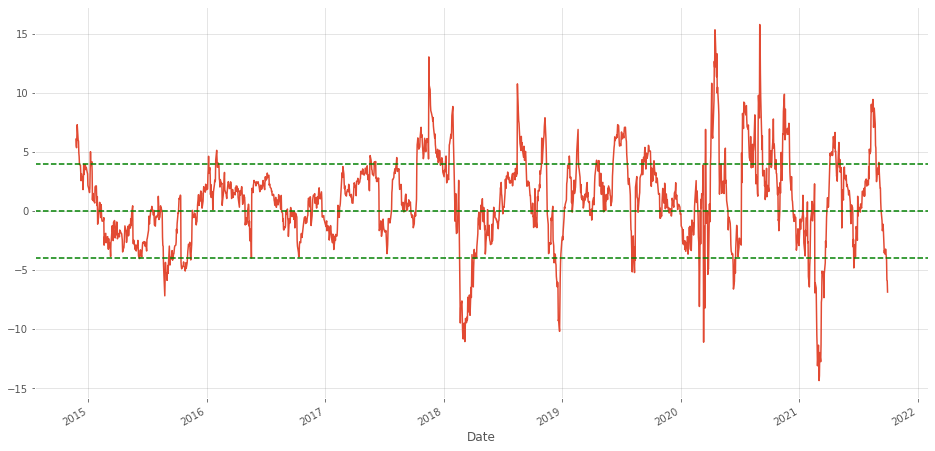

In [14]:
WMT["DIST"].dropna().plot(figsize = (16, 8))
plt.axhline(T, color = "g", ls = "--")
plt.axhline(0, color = "g", ls = "--")
plt.axhline(-T, color = "g", ls = "--")

### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

In [15]:
WMT["POSITION"] = np.where(WMT["DIST"] > T,
                           -1,0
                          )
WMT["POSITION"] = np.where(WMT["DIST"] < -T,
                           1,WMT["POSITION"]
                          )
# WMT["POSITION"] = np.where(WMT["DIST"] * WMT["DIST"].shift(1) < 0,
#                           0, WMT["POSITIONS"])
# WMT["POSITION"] = WMT["POSITION"].ffill()
# WMT["POSITION"] = WMT["POSITION"].fillna(0)

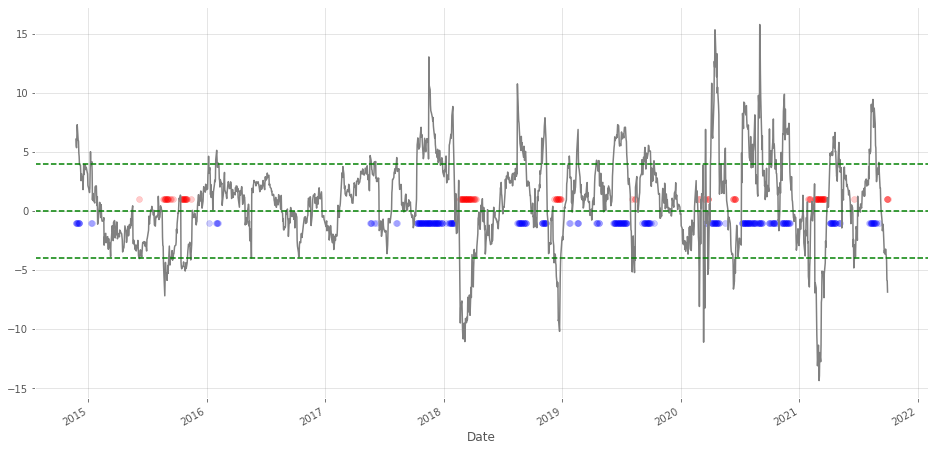

In [16]:
WMT["DIST"].dropna().plot(figsize = (16, 8), color = "grey")

plt.axhline(T, color = "g", ls = "--")
plt.axhline(0, color = "g", ls = "--")
plt.axhline(-T, color = "g", ls = "--")

plt.scatter(WMT["POSITION"].loc[WMT["POSITION"] < 0].index,
            WMT["POSITION"][WMT["POSITION"] < 0], 
            color = "b",
            alpha = 0.2)
plt.scatter(WMT["POSITION"].loc[WMT["POSITION"] > 0].index,
            WMT["POSITION"][WMT["POSITION"] > 0], 
            color = "r",
            alpha = 0.2)

In [17]:
WMT["POSITION"][(WMT["POSITION"] == 1) | (WMT["POSITION"] == -1)].value_counts().sum() #???418

419

### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were  __419__ trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

<AxesSubplot:xlabel='Date'>

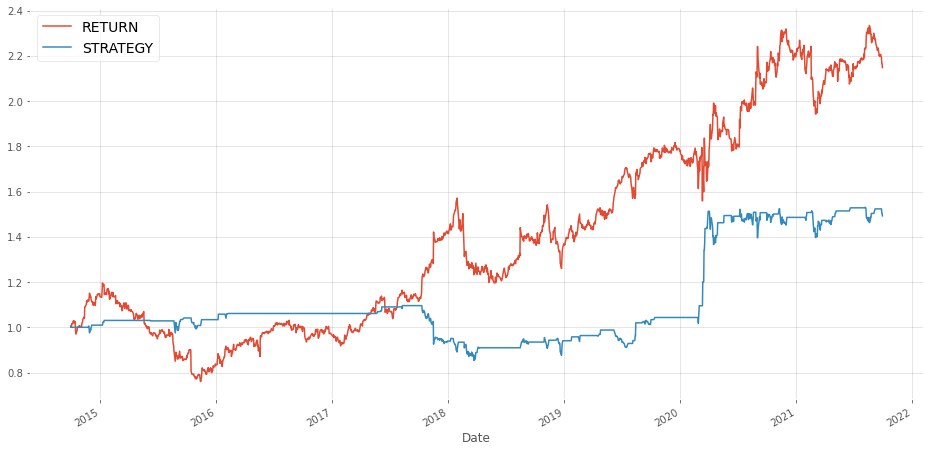

In [18]:
WMT["RETURN"] = np.log(WMT["PRICE"] / WMT["PRICE"].shift(1))
WMT["STRATEGY"] = WMT["POSITION"].shift(1) * WMT["RETURN"]
WMT[["RETURN", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16,8))

### <font color = red> Question 8</font>. Now let's analyze GE. We are interested in predicting future market direction.

### Here, first, predict tomorrow’s index level given the index level of today, yesterday, the day before yesterday—namely, three lags.

### Then, also predict tomorrow’s index level, using 30 lags.  <font color = blue> Choose between the two lags that give you better prediction results for your answer to this question.</font>.

### Use `scikit-learn` module with solver `lbfgs`, setting `C` at `1e7`, `max_iter` at `1000`.

### Plot the gross performance of the base instrument and the strategy over time (in-sample, no transaction costs).

In [19]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [26]:
GE = pd.DataFrame(D_ADJ["GE"])
GE.rename(columns = {"GE" : "PRICE"},
          inplace = True)

LAGS_1 = 3
LAGS_2 = 30
COLS_1 = []
COLS_2 = []
for lag in range(1, LAGS_1+1):
    COL = f"LAG_{lag}"
    GE[COL] = GE["PRICE"].shift(lag)
    COLS_1.append(COL)
    COLS_2.append(COL)
for lag in range(LAGS_1+1, LAGS_2+1):
    COL = f"LAG_{lag}"
    GE[COL] = GE["PRICE"].shift(lag)
    COLS_2.append(COL)

GE.dropna(inplace = True)

OLS_1 = np.linalg.lstsq(GE[COLS_1],
                        GE["PRICE"],
                        rcond = None)[0]
OLS_2 = np.linalg.lstsq(GE[COLS_2],
                        GE["PRICE"],
                        rcond = None)[0]
GE["PREDICTION_1"] = np.dot(GE[COLS_1],
                               OLS_1)
GE["PREDICTION_2"] = np.dot(GE[COLS_2],
                               OLS_2)

In [21]:
np.mean((GE["PREDICTION_1"] - GE["PRICE"])**2)

5.106451240811565

In [22]:
np.mean((GE["PREDICTION_2"] - GE["PRICE"])**2)

5.02201706271919

### 30 lags give better prediction results

<AxesSubplot:xlabel='Date'>

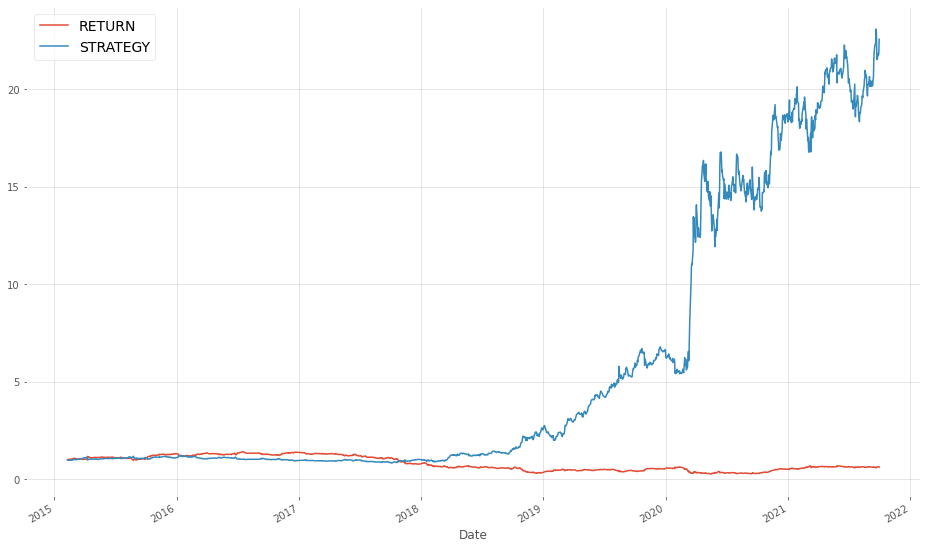

In [28]:
GE["RETURN"] = np.log(GE["PRICE"] / GE["PRICE"].shift(1))
GE.dropna(inplace = True)

lags = 30
cols = []
for lag in range(1, lags + 1):
    col = "lag_{}".format(lag)
    GE[col] = GE["RETURN"].shift(lag)
    cols.append(col)
GE.dropna(inplace = True)

glm = linear_model.LogisticRegression(solver = "lbfgs",
                                      multi_class = "auto",
                                      max_iter = 1000,
                                      C = 1e7)
glm.fit(GE[cols],
        np.sign(GE["RETURN"]))

GE["prediction"] = glm.predict(GE[cols])

GE["STRATEGY"] = GE["prediction"] * GE["RETURN"]
GE[["RETURN", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16, 10))

### <font color = red> Question 9</font>. Now let's come up with performance metrics of accuracy.

    Here, the prediction is ___912___ times correct and ___735___ wrong. The accuracy is ____54.46____ %.

In [29]:
HITS = np.sign(GE["RETURN"].iloc[lags:] * GE["prediction"].iloc[lags:]).value_counts()
HITS

1.000     891
-1.000    726
0.000      27
dtype: int64

In [30]:
accuracy_score(GE["prediction"],
               np.sign(GE["RETURN"]))

0.5418160095579451

### <font color = red> Question 10</font>. Please calculate the Sharpe Ratio of the strategies for `IBM`, `WMT`, and `GE`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of ____-0.35_____ . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of ____0.46_____ .

    Classification algorithm-based strategy for GE leads to a Sharpe ratio of ____1.306______ .

In [31]:
IBM["STRATEGY"]

Date
2014-12-22      NaN
2014-12-23   -0.005
2014-12-24    0.003
2014-12-26   -0.003
2014-12-29    0.011
              ...  
2021-09-24   -0.006
2021-09-27   -0.008
2021-09-28    0.008
2021-09-29   -0.012
2021-09-30    0.002
Name: STRATEGY, Length: 1706, dtype: float64

In [32]:
np.sqrt(253) * IBM["STRATEGY"].mean() / IBM["STRATEGY"].std()

-0.35148410997985735

In [33]:
np.sqrt(253) * WMT["STRATEGY"].mean() / WMT["STRATEGY"].std()

0.46113302577483367

In [34]:
np.sqrt(253) * GE["STRATEGY"].mean() / GE["STRATEGY"].std()

1.2626694934239484

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>